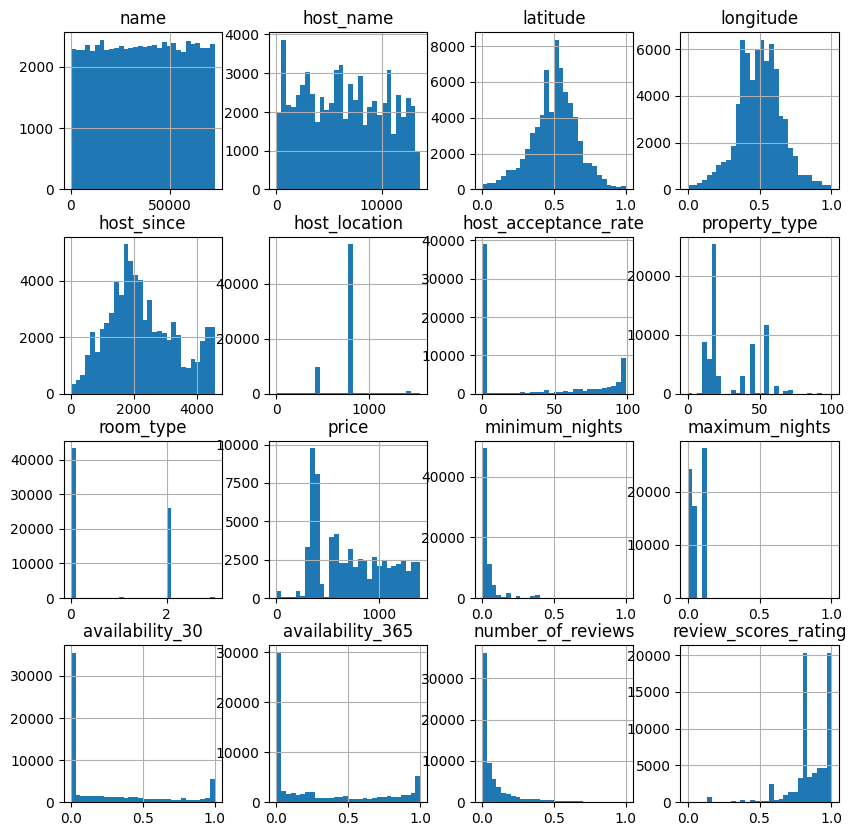

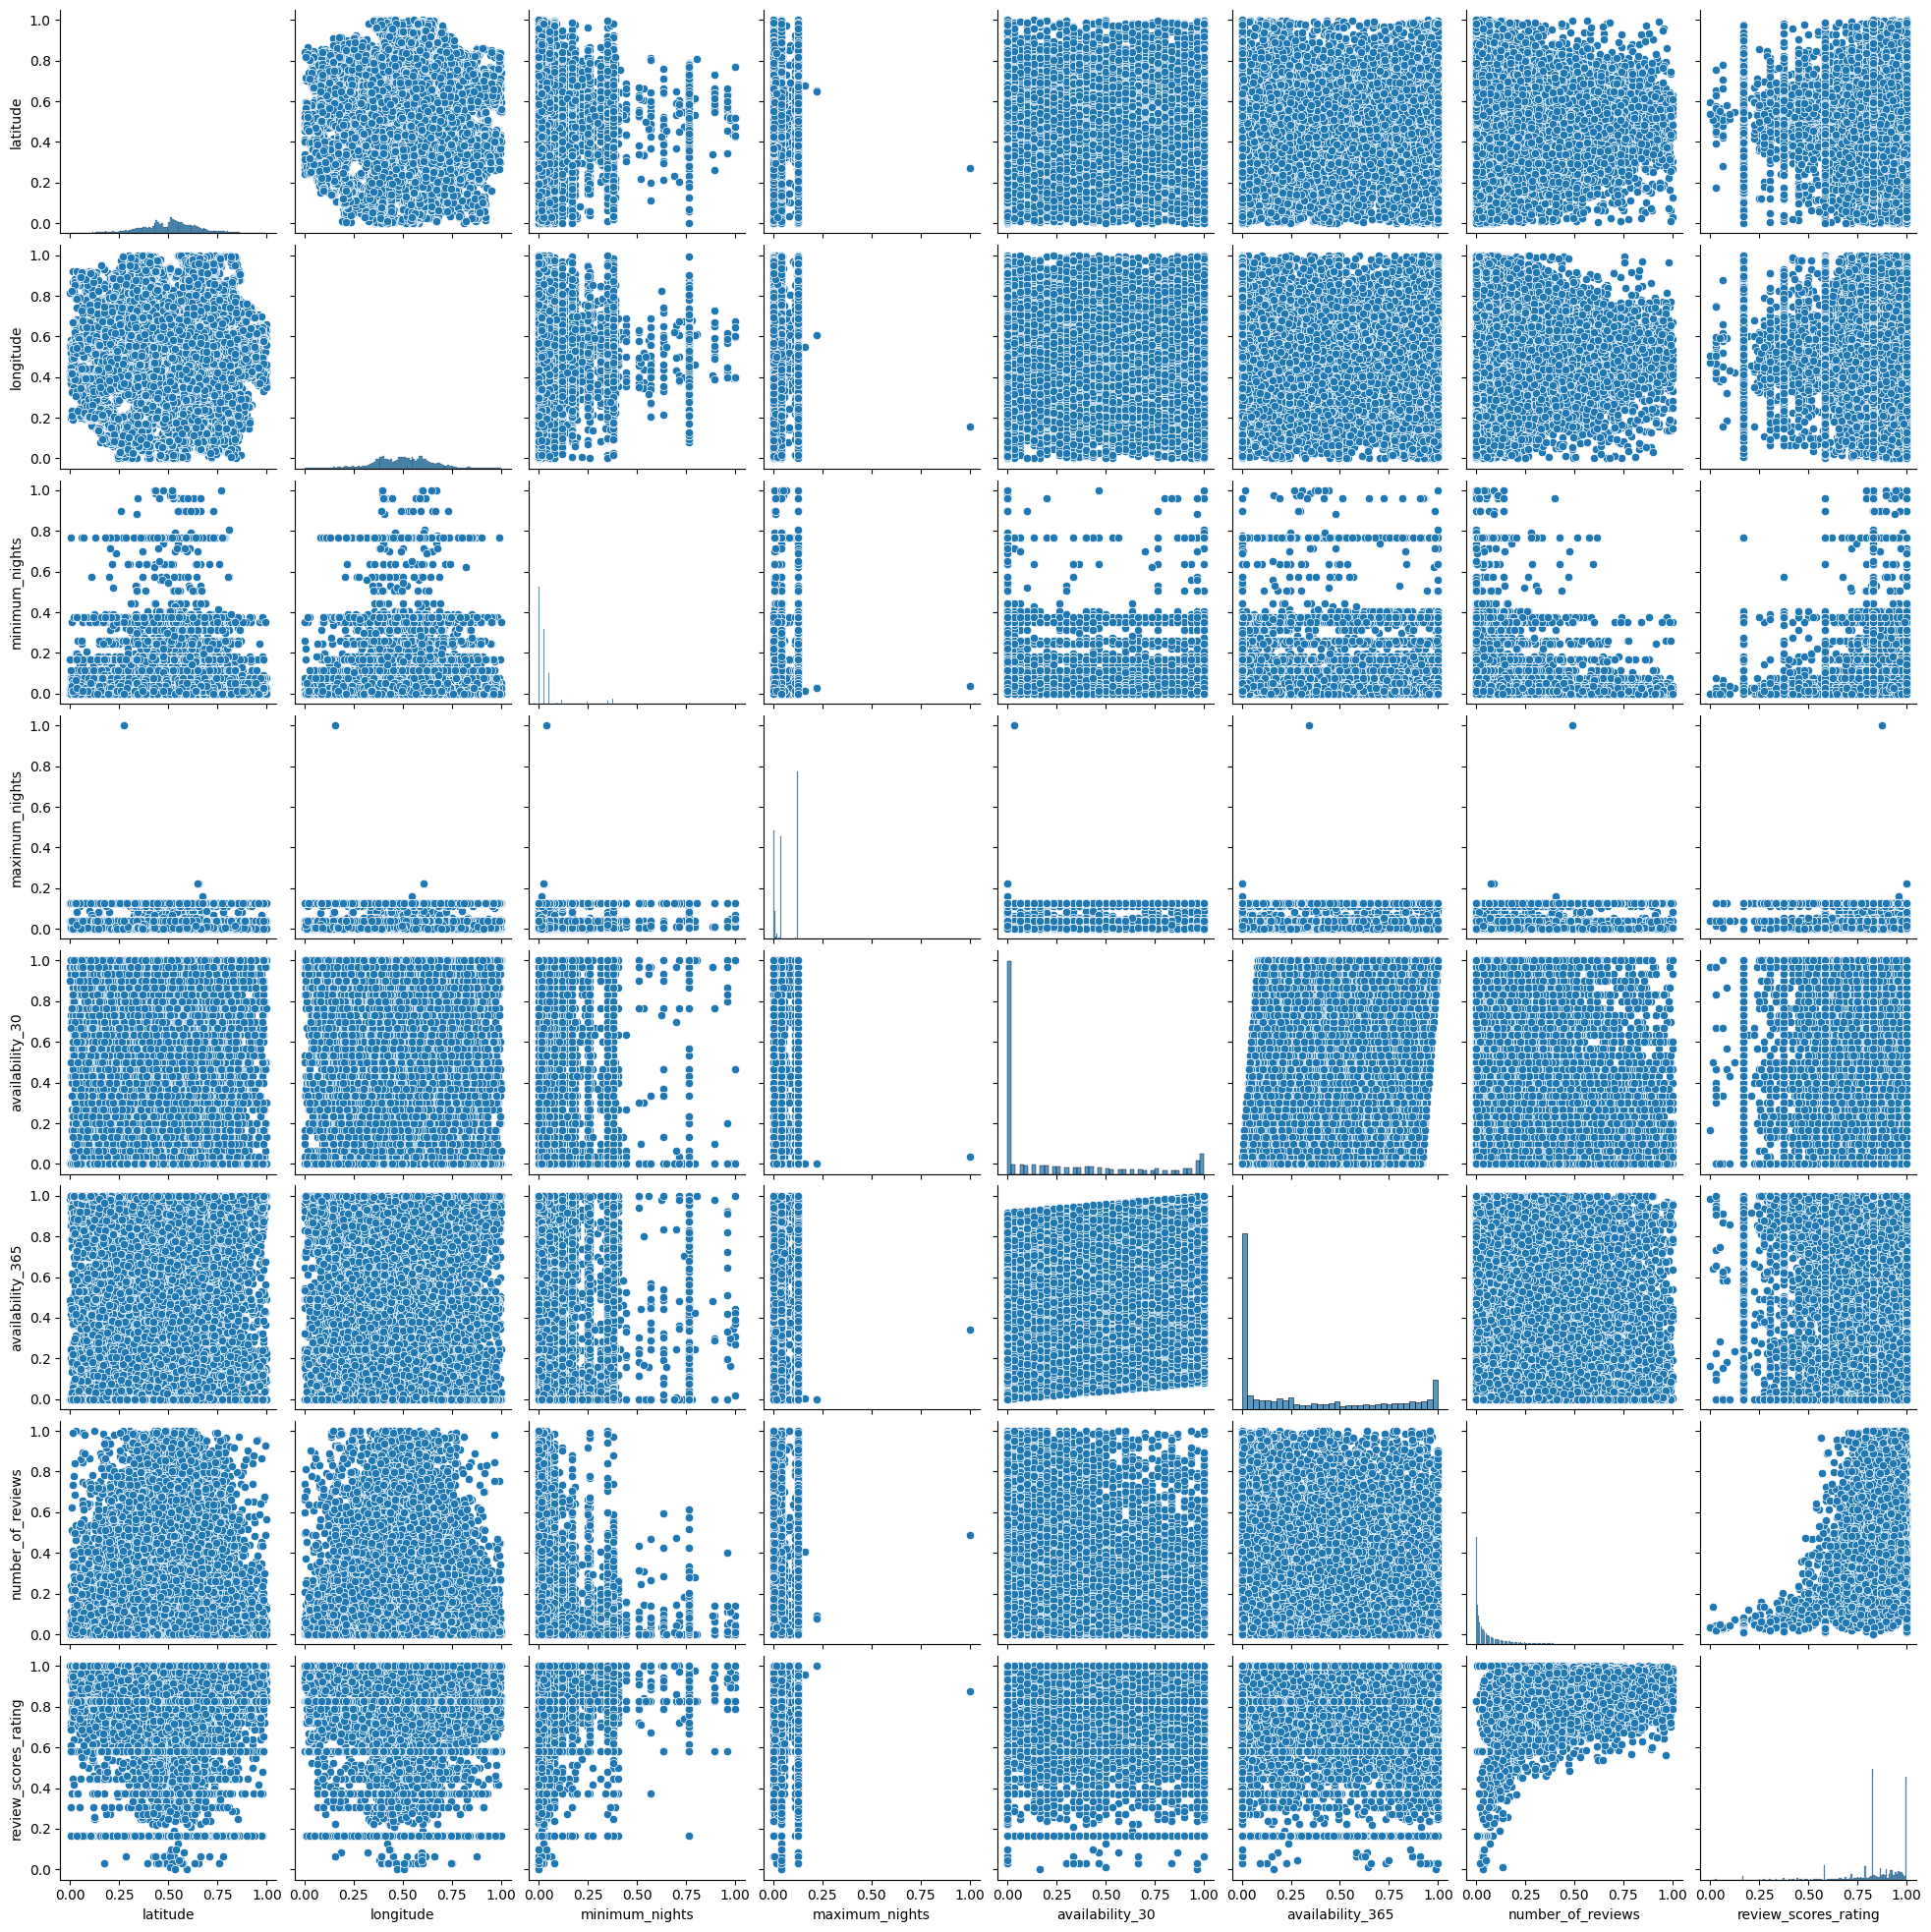

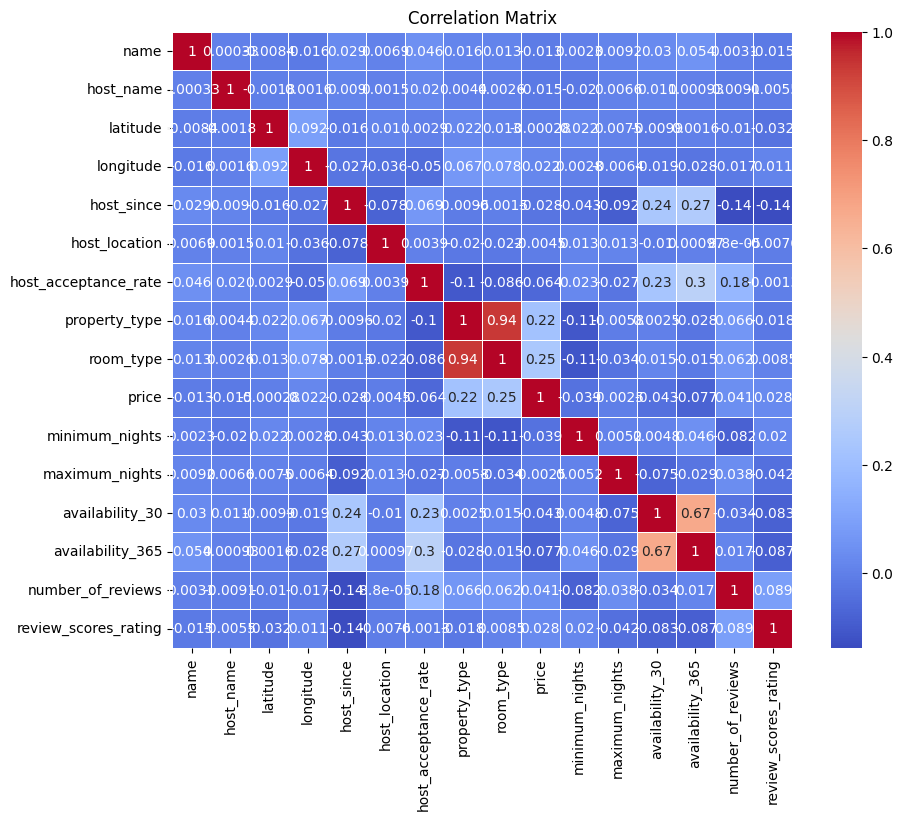

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

df = pd.read_csv('veri/dataset.csv')

# 2. Eksik Verilerin Doldurulması veya Çıkarılması
# Eksik verileri ortalama ile doldurma (numeric) ve mod ile doldurma (categorical)
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

imputer_num = SimpleImputer(strategy='mean')  # Sayısal değişkenler için doldurdum
imputer_cat = SimpleImputer(strategy='most_frequent')  # Kategorik değişkenler için doldurdum

df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])



# 3. Kategorik Değişkenlerin Sayısal Hale Getirilmesi (Encoding)
# Label Encoding (sınıflandırmada sıralı olmayan kategorik verileri sayısallaştırma)
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 4. Outlier (Aykırı Değer) Tespiti ve İşlenmesi
# Aykırı değerleri Z-Skoru ile tespit etme ve aykırı değerleri çıkarma
from scipy import stats

z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]  # Z-skoru 3'ten büyük olanları çıkar

# 5. Verinin Normalize Edilmesi veya Standartlaştırılması
# Normalizasyon (Min-Max Scaling) veya Standardizasyon (Z-Score Standartlaştırma)

# Min-Max Scaler (Normalizasyon)
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Standartlaştırma (Z-skoru) yapmak için işe yarıyor alttaki kod
# scaler = StandardScaler()
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 6. Veri Görselleştirmeleri
# Histogramlar
df.hist(figsize=(10, 10), bins=30)
plt.show()

# Scatter Plot (Numerik değişkenler için korelasyon analizi)
sns.pairplot(df[numeric_cols])
plt.show()

# Korelasyon Matrisi ve Isı Haritası
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 7. Yeni CSV Dosyasına Kaydetme
df.to_csv('veri/cleaningdataset.csv', index=False)
